In [1]:
##Importing the required libraries
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras import optimizers
K.set_image_dim_ordering('th') #input shape: (channels, height, width)
%matplotlib inline
import matplotlib.pyplot as plt
import PIL

Using Theano backend.


In [2]:
#Preprocessing the excel sheet
train_df = pd.read_csv(r"C:\Users\jambuvr\Documents\kaggle\facial_Recognition\fer2013\fer2013_Train.csv")
valid_df = pd.read_csv(r"C:\Users\jambuvr\Documents\kaggle\facial_Recognition\fer2013\test.csv")
Y_train = train_df['emotion'].values
train_df=train_df.drop(['emotion'], axis=1)
#train_df.drop(train_df.index[0], inplace=True)

train_df.to_csv(r"C:\Users\jambuvr\Documents\kaggle\facial_Recognition\fer2013\train_mody_pixels.csv",header=None,index=False)
valid_df.to_csv(r"C:\Users\jambuvr\Documents\kaggle\facial_Recognition\fer2013\test_mody_pixels.csv",header=None,index=False)

In [3]:
train_df = pd.read_csv(r"C:\Users\jambuvr\Documents\kaggle\facial_Recognition\fer2013\train_mody_pixels.csv",index_col=None,delim_whitespace=True,header=None)
valid_df = pd.read_csv(r"C:\Users\jambuvr\Documents\kaggle\facial_Recognition\fer2013\test_mody_pixels.csv",index_col=None,delim_whitespace=True,header=None)

valid_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,151,151,151,144,165,165,158,158,172,179,...,227,227,227,241,248,248,255,241,234,227
1,86,81,75,66,60,53,57,60,49,46,...,31,20,33,44,49,64,48,40,53,55
2,37,60,83,92,100,106,111,104,99,92,...,92,72,38,8,1,1,0,1,5,7
3,116,110,109,109,103,97,92,78,74,77,...,70,84,85,88,83,70,73,63,59,58
4,101,114,119,117,117,114,111,109,111,111,...,67,70,62,62,62,75,109,179,187,179


In [4]:
Y_train

array([0, 0, 2, ..., 4, 0, 4], dtype=int64)

In [5]:
#converting the 1D array into 2D array  to represent an image .and plotting it

x_train = train_df.values.astype('float64')
#Y_train = train_df['label'].values

x_valid = valid_df.values.astype('float64')

In [6]:
img_width, img_height = 48, 48
n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

n_classes = 7 
print x_valid.shape
print n_valid


(1312L, 2304L)
1312


In [7]:
x_train = x_train.reshape(n_train,1,img_width,img_height)
x_valid = x_valid.reshape(n_valid,1,img_width,img_height)

x_train = x_train/255 #normalize from [0,255] to [0,1]
x_valid = x_valid/255 

y_train = to_categorical(Y_train,n_classes)

In [8]:
y_train

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

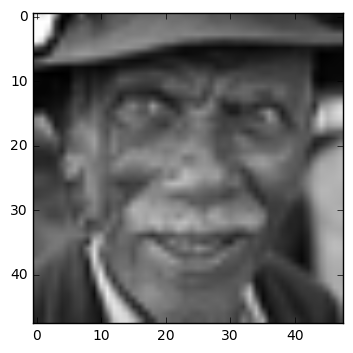

In [9]:
imgplot = plt.imshow((x_train[90,0,:,:,]),cmap='gray')

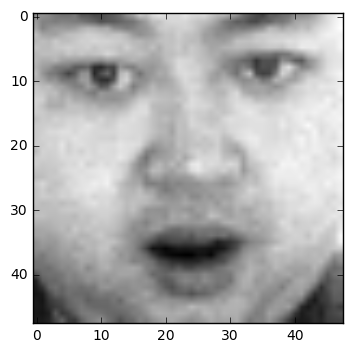

In [22]:
imgplot = plt.imshow((x_valid[10,0,:,:,]),cmap='gray')

In [30]:
from keras.models import Sequential
from keras.layers.convolutional import *
from keras.layers.core import Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator


In [31]:
n_filters = 32
filter_size1 = 3
filter_size2 = 2
pool_size1 = 3
pool_size2 = 1
n_dense = 64


In [32]:
model = Sequential()

model.add(Convolution2D(n_filters, filter_size1, filter_size1, batch_input_shape=(None, 1, img_width, img_height), activation='relu', border_mode='valid'))
model.add(Convolution2D(n_filters, filter_size1, filter_size1, activation='relu', border_mode='valid'))

model.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))

model.add(Convolution2D(n_filters, filter_size1, filter_size1, activation='relu', border_mode='valid'))

model.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))


model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(n_dense))

model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(n_classes))

model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\jambuvr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", activation="relu", batch_input_shape=(None, 1, ...)`
  app.launch_new_instance()
C:\Users\jambuvr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", activation="relu")`
C:\Users\jambuvr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", activation="relu")`


In [ ]:
batch_size = 32
n_epochs = 6

model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=n_epochs,verbose=2,
          validation_split=.2)


Train on 22967 samples, validate on 5742 samples
Epoch 1/6


In [34]:
#predicting images on the validation data
yPred = model.predict_classes(x_valid,batch_size=32,verbose=1)

np.savetxt('mnist_output.csv', np.c_[range(1,len(yPred)+1),yPred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

1312/1312 [==============================] - 2s     


In [35]:
yPred

array([4, 0, 4, ..., 3, 0, 3], dtype=int64)

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 46, 46)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 44, 44)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 12, 12)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
__________